In [20]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout
import splitfolders
import keras

In [21]:
splitfolders.ratio("Alzheimer_Dataset", output="output",seed=1345,ratio=(0.8,0.1,0.1))


In [23]:
train_set = keras.utils.image_dataset_from_directory(
    "./output/train",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)


test_set = keras.utils.image_dataset_from_directory(
    "./output/test",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)

val_set = keras.utils.image_dataset_from_directory(
    "./output/train",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)


Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 5119 files belonging to 4 classes.


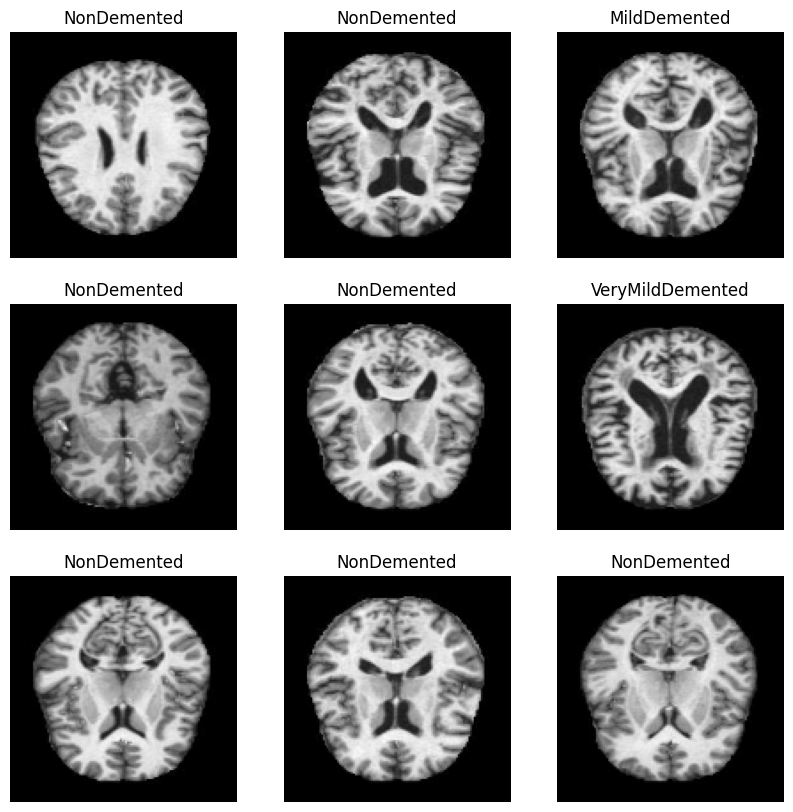

In [24]:
class_names = train_set.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [25]:
inception_model = Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(128,128,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)

In [26]:
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dropout(0.2))
inception_model.add(Dense(4, activation='softmax'))

In [27]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22853924 (87.18 MB)
Trainable params: 1051140 (4.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [28]:
inception_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])

history = inception_model.fit(train_set,
    steps_per_epoch=len(train_set),
    validation_data=val_set,
    validation_steps=len(val_set),
    epochs=10)

Epoch 1/10
160/160 [==============================] - 187s 1s/step - loss: 12.2810 - accuracy: 0.4712 - val_loss: 0.9503 - val_accuracy: 0.5036
Epoch 2/10
160/160 [==============================] - 176s 1s/step - loss: 0.9920 - accuracy: 0.5175 - val_loss: 0.9324 - val_accuracy: 0.5101
Epoch 3/10
160/160 [==============================] - 175s 1s/step - loss: 0.9713 - accuracy: 0.5333 - val_loss: 0.9041 - val_accuracy: 0.5728
Epoch 4/10
160/160 [==============================] - 177s 1s/step - loss: 0.9584 - accuracy: 0.5288 - val_loss: 0.9365 - val_accuracy: 0.5399
Epoch 5/10
160/160 [==============================] - 177s 1s/step - loss: 0.9657 - accuracy: 0.5274 - val_loss: 0.9134 - val_accuracy: 0.5136
Epoch 6/10
160/160 [==============================] - 177s 1s/step - loss: 0.9504 - accuracy: 0.5200 - val_loss: 0.9279 - val_accuracy: 0.5140
Epoch 7/10
160/160 [==============================] - 176s 1s/step - loss: 0.9534 - accuracy: 0.5198 - val_loss: 0.8999 - val_accuracy: 0.509

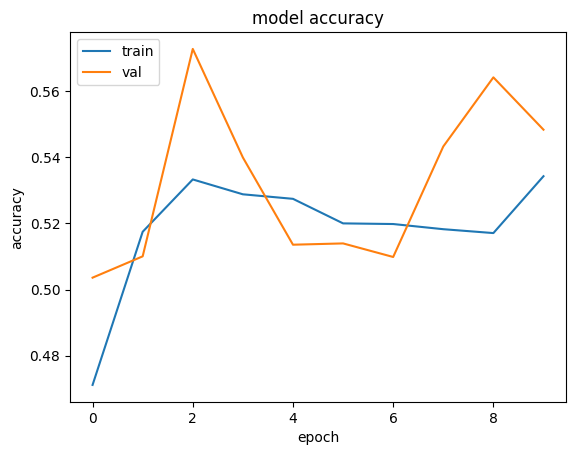

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

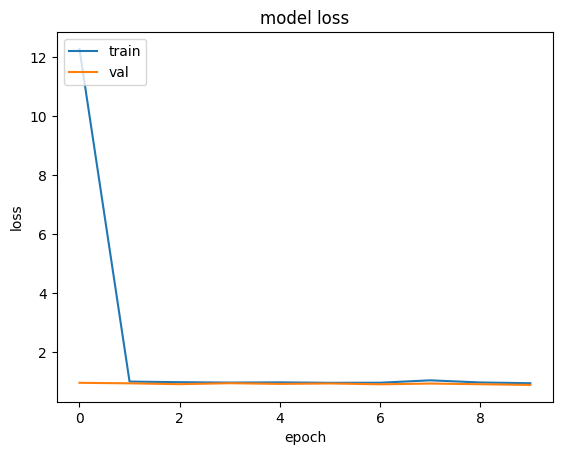

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()